# Retrieve data with APIs from Python

Lino Galiana  
2024-09-23

<div class="alert alert-info" role="alert">
<h3 class="alert-heading">Version 🇫🇷</h3>
This is the French version 🇫🇷 of that chapter,to see the English version go <a href="https://pythonds.linogaliana.fr/content/manipulation/04c_API_TP.html">there</a>
</div>

# 1. Introduction: What is an API?

## 1.1 Definition

To explain the principle of an API, I will use the beginning of the dedicated section in the collaborative documentation on `R` (a statistical software close to `Python`) named [utilitR](https://www.book.utilitr.org/api.html) that I recommend reading:

> An *Application Programming Interface* (or API) is a programming interface that allows the use of an existing application to retrieve data. The term API might seem intimidating, but it is simply a way of making data available: instead of letting the user directly access databases (often large and complex), the API allows them to submit a request that is processed by the server hosting the database, and then receive data in response to their request.
>
> From a computing perspective, an API is a clearly identified entry point through which software offers services to other software (or users). The goal of an API is to provide an access point to a functionality that is easy to use and hides the implementation details. For example, the Sirene API allows retrieving the legal name of a company from its Siren identifier by querying the available reference on the Internet directly from an R script, without needing to know all the details of the Sirene directory.
>
> At Insee and elsewhere, the connection between databases for new projects tends to be done via APIs. Access to data through APIs is becoming increasingly common and is expected to become a basic skill for any data user.
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

## 1.2 Benefits of APIs

Again, quoting the [utilitR](https://www.book.utilitr.org/api.html) documentation:

APIs offer multiple advantages:

> -   APIs make programs more reproducible. Indeed, with APIs, it is possible to easily update the data used by a program if it changes. This increased flexibility for the user saves the data producer from having to perform multiple extractions and reduces the issue of coexisting different versions of the data.
> -   With APIs, the user can easily extract a small part of a larger database.
> -   APIs allow data to be made available while limiting the number of people who have access to the databases themselves.
> -   APIs can provide customized services for users (e.g., specific access for heavy users).
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

The increased use of APIs as part of open-data strategies is one of the pillars of the 15 ministerial roadmaps on the openness, circulation, and valorization of public data.

## 1.3 Using APIs

Once again, quoting the [`utilitR`](https://www.book.utilitr.org/api.html) documentation:

> An API can often be used in two ways: through a web interface or through software (R, Python, etc.). Moreover, APIs can be offered with varying degrees of freedom for the user:
>
> -   either with free access (use is not controlled, and the user can use the service as they see fit);
> -   or by generating an account and an access token that secure the use of the API and limit the number of requests.
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

Many APIs require authentication, meaning a user account to access the data. Initially, we will focus exclusively on open APIs without access restrictions. However, some exercises and examples will allow you to try out APIs with access restrictions.

# 2. Querying an API

## 2.1 General principle

> Using the web interface is useful in an exploratory approach but quickly reaches its limits, especially when regularly consulting the API. The user will quickly realize that it is much more convenient to use an API through processing software to automate queries or perform bulk downloads. Moreover, a web interface does not always exist for all APIs.
>
> The primary way to access an API is by sending a request to it through appropriate software (R, Python, Java, etc.). As with using a function, calling an API involves parameters that are detailed in the API documentation.
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

Here are the important elements to keep in mind about requests (again borrowing from [`utilitR`](https://www.book.utilitr.org/api.html)):

-   The **entry point** of a service offered by an API is presented as a URL (web address). Each service provided by an API has its own URL. For example, in the case of OpenFood Facts, the URL to use to get information on a specific product (identifier `737628064502`) is <https://world.openfoodfacts.org/api/v0/product/737628064502.json>
-   This URL must be supplemented with different parameters that specify the request (e.g., the Siren identifier). These parameters are added to the URL, often following a `?`. Each service provided by an API has its own parameters, detailed in the documentation.
-   When the user submits their request, the API sends back a structured response containing all the requested information. The result returned by an API is mainly in `JSON` or `XML` formats (two formats where information is nested hierarchically). More rarely, some services provide information in a flat format (like csv).

Due to the hierarchical nature of the `JSON` or `XML` formats, the result is not always easy to retrieve, but `Python` offers excellent tools for this (better than those in `R`). Some packages, particularly `json`, facilitate the extraction of fields from an API output. In some cases, specific packages for an API have been created to simplify writing a request or retrieving the result. For example, the [`pynsee`](https://github.com/InseeFrLab/Py-Insee-Data/tree/main/pynsee) package offers options that are automatically translated into the request URL to facilitate working with Insee data.

## 2.2 Example using an Ademe API to get energy diagnostics

The energy performance diagnostic (DPE) provides information on the energy performance of a home or building by assessing its energy consumption and its impact in terms of greenhouse gas emissions in France.

The energy performance data of buildings is made available by [Ademe](https://data.ademe.fr/datasets/dpe-france). Since this data is relatively large, an API can be useful when only interested in a subset of the data. Documentation and a testing area for the API are available on the [API GOUV](https://api.gouv.fr/documentation/api_dpe_logements) site[1].

Suppose we want to retrieve about a hundred values for the commune of Villieu-Loyes-Mollon in Ain (Insee code 01450).

The API has several entry points. Generally, the common root is:

> https://koumoul.com/data-fair/api/v1/datasets/dpe-france

Then, depending on the desired API, we will add elements to this root. In this case, we will use the `field` API, which allows us to retrieve rows based on one or more criteria (for us, the geographic location):

The example given in the technical documentation is

> GET https://koumoul.com/data-fair/api/v1/datasets/dpe-france/values/{field}

which in `Python` will translate to using the `get` method from the `Request` package on a URL structured as follows:

-   it will start with `https://koumoul.com/data-fair/api/v1/datasets/dpe-france/values/`;
-   it will then be followed by search parameters. The `{field}` field typically starts with a `?`, allowing us to specify parameters in the format `parameter_name=value`.

Based on the documentation, the first parameters we want are:

-   The number of pages, allowing us to get a certain number of results. We will only retrieve 10 pages, which corresponds to about 100 results. However, we will specify that we want 100 results.
-   The output format. We will prefer `JSON`, which is a standard format in the API world. `Python` offers great flexibility with one of its basic objects, the dictionary (type `dict`), for handling such files.
-   The commune code of the data we want to retrieve. As mentioned earlier, we will retrieve data where the commune code is `01450`. According to the documentation, the commune code should be passed in the format: `code_insee_commune_actualise:{commune_code}`. To avoid any risk of misformatting, we will use `%3A` to denote `:`, `%2A` to denote `*`, and `%22` to denote `"`.
-   Other ancillary parameters suggested by the documentation.

This gives us a URL with the following structure:

[1] Documentation is also available [here](https://koumoul.com/openapi-viewer/?proxy=false&hide-toolbar=true&url=https://koumoul.com/s/data-fair/api/v1/datasets/dpe-france/api-docs.json)

In [1]:
city_code = "01450"
size = 100
api_root = "https://koumoul.com/data-fair/api/v1/datasets/dpe-france/lines"
url_api = (
    f"{api_root}?format=json&q_mode=simple&qs=code_insee_commune_actualise"
    + "%3A%22"
    + f"{city_code}"
    + "%22"
    + f"&size={size}&select="
    + "%2A&sampling=neighbors"
)


If you enter this URL into your browser, you should land on an unformatted `JSON`[1]. In `Python`, you can use `requests` to retrieve the data[2]:

[1] JSON is a highly appreciated format in the field of *big data* because it allows stacking incomplete data. It is one of the preferred formats of the No-SQL paradigm, for which this [excellent course](http://b3d.bdpedia.fr/) offers a gentle introduction.

[2] Depending on the API, we either need nothing more if we directly obtain a JSON, or we may need to use a parser like `BeautifulSoup` otherwise. Here, the JSON can be formatted relatively easily.

In [2]:
import requests
import pandas as pd

req = requests.get(url_api)
wb = req.json()


Let’s take, for example, the first 1000 characters of the result to get an idea of the output and confirm that our filter at the communal level has been correctly applied:

``` python
print(req.content[:1000])
```

b’{“total”: 121,“next”: “https://koumoul.com/data-fair/api/v1/datasets/dpe-france/lines?format=json&q_mode=simple&qs=code_insee_commune_actualise%3A%2201450%22&size=100&select=\*&sampling=neighbors&after=102719%2C912454”,“results”: \[\n {“classe_consommation_energie”: “E”,“tr001_modele_dpe_type_libelle”: “Vente”,“annee_construction”: 1,“\_geopoint”: “45.927488,5.230195”,“latitude”: 45.927488,“surface_thermique_lot”: 106.87,“\_i”: 2,“tr002_type_batiment_description”: “Maison Individuelle”,“geo_adresse”: “Rue du Chateau 01800 Villieu-Loyes-Mollon”,“\_rand”: 959550,“code_insee_commune_actualise”: “01450”,“estimation_ges”: 9,“geo_score”: 0.58,“classe_estimation_ges”: “B”,“nom_methode_dpe”: “M9thode Facture”,“tv016_departement_code”: “01”,“consommation_energie”: 286,“date_etablissement_dpe”: “2013-04-15”,“longitude”: 5.230195,“\_score”: null,’

In [4]:
import pandas as pd
import geopandas as gpd


def get_dpe_from_url(url):

    req = requests.get(url)
    wb = req.json()
    df = pd.json_normalize(wb["results"])

    dpe = gpd.GeoDataFrame(
        df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs=4326
    )
    dpe = dpe.dropna(subset=["longitude", "latitude"])

    return dpe


dpe = get_dpe_from_url(url_api)
dpe.head(2)


2 rows × 23 columns

Let’s try to map these DPEs (energy performance certificates) with the construction years of the buildings. With `Folium`, we get the following interactive map:

In [5]:
import seaborn as sns
import folium

palette = sns.color_palette("coolwarm", 8)


def interactive_map_dpe(dpe):

    # convert to number
    dpe["color"] = [
        ord(dpe.iloc[i]["classe_consommation_energie"].lower()) - 96
        for i in range(len(dpe))
    ]
    dpe = dpe.loc[dpe["color"] <= 7]
    dpe["color"] = [palette.as_hex()[x] for x in dpe["color"]]

    center = dpe[["latitude", "longitude"]].mean().values.tolist()
    sw = dpe[["latitude", "longitude"]].min().values.tolist()
    ne = dpe[["latitude", "longitude"]].max().values.tolist()

    m = folium.Map(location=center, tiles="OpenStreetMap")

    # I can add markers one by one on the map
    for i in range(0, len(dpe)):
        folium.Marker(
            [dpe.iloc[i]["latitude"], dpe.iloc[i]["longitude"]],
            popup=f"Year of construction: {dpe.iloc[i]['annee_construction']}, <br>DPE: {dpe.iloc[i]['classe_consommation_energie']}",
            icon=folium.Icon(
                color="black", icon="home", icon_color=dpe.iloc[i]["color"]
            ),
        ).add_to(m)

    m.fit_bounds([sw, ne])

    return m


m = interactive_map_dpe(dpe)


/opt/mamba/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
# Display the map
m


Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-3.7.1.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_e9a65fcf2e83b95b08e146b49842ce37 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_e9a65fcf2e83b95b08e146b49842ce37" ></div>
 
</body>
<script>
 
 
 var map_e9a65fcf2e83b95b08e146b49842ce37 = L.map(
 "map_e9a65fcf2e83b95b08e146b49842ce37",
 {
 center: [45.922392181818175, 5.225450250000001],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_972fbf0fb02ab2870d3dab3645d083cd = L.tileLayer(
 "https://tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "\u0026copy; \u003ca href=\"https://www.openstreetmap.org/copyright\"\u003eOpenStreetMap\u003c/a\u003e contributors", "detectRetina": false, "maxNativeZoom": 19, "maxZoom": 19, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 );
 
 
 tile_layer_972fbf0fb02ab2870d3dab3645d083cd.addTo(map_e9a65fcf2e83b95b08e146b49842ce37);
 
 
 var marker_dfe33e3dcabd57d9698780477ce549df = L.marker(
 [45.927488, 5.230195],
 {}
 ).addTo(map_e9a65fcf2e83b95b08e146b49842ce37);
 
 
 var icon_9e40344b66e6154605105408465dadb8 = L.AwesomeMarkers.icon(
 {"extraClasses": "fa-rotate-0", "icon": "home", "iconColor": "#f7b89c", "markerColor": "black", "prefix": "glyphicon"}
 );
 marker_dfe33e3dcabd57d9698780477ce549df.setIcon(icon_9e40344b66e6154605105408465dadb8);
 
 
 var popup_2b87e9c7f3647e199232eb682525ac67 = L.popup({"maxWidth": "100%"});

 
 
 var html_17246687b0abe6e607795faaec2aa95a = $(`<div id="html_17246687b0abe6e607795faaec2aa95a" style="width: 100.0%; height: 100.0%;">Year of construction: 1, <br>DPE: E</div>`)[0];
 popup_2b87e9c7f3647e199232eb682525ac67.setContent(html_17246687b0abe6e607795faaec2aa95a);
 
 

 marker_dfe33e3dcabd57d9698780477ce549df.bindPopup(popup_2b87e9c7f3647e199232eb682525ac67)
 ;

 
 
 
 var marker_27ab77910e81c6e3b476bce94bc986e2 = L.marker(
 [45.931376, 5.230461],
 {}
 ).addTo(map_e9a65fcf2e83b95b08e146b49842ce37);
 
 
 var icon_ff83347c308dea15686a2c76bbc8490f = L.AwesomeMarkers.icon(
 {"extraClasses": "fa-rotate-0", "icon": "home", "iconColor": "#d95847", "markerColor": "black", "prefix": "glyphicon"}
 );
 marker_27ab77910e81c6e3b476bce94bc986e2.setIcon(icon_ff83347c308dea15686a2c76bbc8490f);
 
 
 var popup_340c7bd21d5d0468c83f04ee4d24ab04 = L.popup({"maxWidth": "100%"});

 
 
 var html_d36

Here, it is not even necessary at first to use the `json` package since the information is already tabulated in the echoed output (we have the same information for all countries):
So we can simply use `Pandas` to transform our data into a `DataFrame` and `Geopandas` to convert it into geographical data:

## 2.3 An incomplete catalog of existing APIs

More and more websites are providing APIs for developers and curious individuals alike.

To name a few well-known ones:

-   `Twitter` <i class="fab fa-twitter"></i>: <https://dev.twitter.com/rest/public>
-   `Facebook` <i class="fab fa-facebook"></i>: <https://developers.facebook.com/>
-   `Instagram` <i class="fab fa-instagram"></i>: <https://www.instagram.com/developer/>
-   `Spotify` <i class="fab fa-spotify"></i>: <https://developer.spotify.com/web-api/>

However, it is worth not limiting ourselves to these, whose data is not always the most interesting. Many data producers, both private and public, make their data available through APIs.

-   [API gouv](https://api.gouv.fr/): many official APIs from the French government and access to documentation
-   Insee: https://api.insee.fr/catalogue/ and [`pynsee`](https://github.com/InseeFrLab/Py-Insee-Data/tree/main/pynsee)
-   Pôle Emploi: https://www.emploi-store-dev.fr/portail-developpeur-cms/home.html
-   SNCF: https://data.sncf.com/api
-   World Bank: https://datahelpdesk.worldbank.org/knowledgebase/topics/125589

# 3. The DVF API: accessing real estate transaction data easily

<div class="alert alert-danger" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-triangle-exclamation"></i> Important</h3>

This section needs updating to prioritize the Cerema DVF API

</div>

The `DVF` (demand for property values) website allows users to view all data related to transactions (sales of houses, apartments, garages, etc.) conducted over the past five years.

A visualization site is available at <https://app.dvf.etalab.gouv.fr/>.

This site is very comprehensive when it comes to knowing the average price per square meter of a neighborhood or comparing regions. The DVF API allows you to go further by retrieving results in a data processing software. It was created by [Christian Quest](https://github.com/cquest) and the source code is available on Github <a href="https://github.com/cquest/dvf_as_api" class="github"><i class="fab fa-github"></i></a>.

The search criteria are as follows:

-   `code_commune` = INSEE code of the municipality (e.g., 94068)
-   `section` = cadastral section (e.g., 94068000CQ)
-   `numero_plan` = plot identifier (e.g., 94068000CQ0110)
-   `lat` + `lon` + `dist` (optional): for a geographical search, `dist` is by default a 500m radius
-   `code_postal`

Additional selection filters:
- `nature_mutation` (Sale, etc.)
- `type_local` (House, Apartment, Local, Dependency)

Requests are of the form: `http://api.cquest.org/dvf?code_commune=29168`.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercise 1: Using the DVF API</h3>

1.  Search for all existing transactions in DVF at Plogoff (municipality code `29168`, in Brittany).
    Display the keys of the JSON and deduce the number of recorded transactions.
2.  Display only the transactions concerning houses.
3.  Use the [API geo](https://api.gouv.fr/documentation/api-geo) to retrieve the municipal boundaries of the city of Plogoff.
4.  Plot the histogram of sales prices.

Feel free to go further by playing with group variables, for example.

</div>

The result for question 2 should look like the following `DataFrame`:

The sales price histogram (question 4) will look like this:

Let’s create a map of the sales, displaying the purchase price.
The interactive map will be presented in the chapters on data visualization.

Assuming the sales DataFrame is called `ventes`, we first need to convert it into a `geopandas` object.

431 rows × 49 columns

Before making a map, we will convert the boundaries of the Plogoff municipality to GeoJSON for easier representation with `folium` ([see the `Geopandas` documentation](https://geopandas.readthedocs.io/en/latest/gallery/polygon_plotting_with_folium.html#Add-polygons-to-map)):

To graphically represent this, you can use the following code (try to understand it, not just execute it).

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-3.7.1.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_bba3d17cb60634ac48eb1d32b485a997 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_bba3d17cb60634ac48eb1d32b485a997" ></div>
 
</body>
<script>
 
 
 var map_bba3d17cb60634ac48eb1d32b485a997 = L.map(
 "map_bba3d17cb60634ac48eb1d32b485a997",
 {
 center: [48.03477472157772, -4.671743032482598],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_019f5bcca67383aa8e5b9f5c7537db18 = L.tileLayer(
 "https://tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "\u0026copy; \u003ca href=\"https://www.openstreetmap.org/copyright\"\u003eOpenStreetMap\u003c/a\u003e contributors", "detectRetina": false, "maxNativeZoom": 19, "maxZoom": 19, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 );
 
 
 tile_layer_019f5bcca67383aa8e5b9f5c7537db18.addTo(map_bba3d17cb60634ac48eb1d32b485a997);
 
 
 var marker_3326eb4373a0b603eb3f147254ec17c1 = L.marker(
 [48.03781, -4.717967],
 {}
 ).addTo(map_bba3d17cb60634ac48eb1d32b485a997);
 
 
 var icon_a23456b035d17ac2610285fbae997e2f = L.AwesomeMarkers.icon(
 {"extraClasses": "fa-rotate-0", "icon": "", "iconColor": "white", "markerColor": "red", "prefix": "glyphicon"}
 );
 marker_3326eb4373a0b603eb3f147254ec17c1.setIcon(icon_a23456b035d17ac2610285fbae997e2f);
 
 
 var popup_e5db72d931d0bcca3d531e769dd8140a = L.popup({"maxWidth": "100%"});

 
 
 var html_ea380e522d236ad773b1ac222e538fa5 = $(`<div id="html_ea380e522d236ad773b1ac222e538fa5" style="width: 100.0%; height: 100.0%;">Adresse: 5215 LA POINTE DU RAZ <br>Vente en 2017 <br>Prix 176000 €</div>`)[0];
 popup_e5db72d931d0bcca3d531e769dd8140a.setContent(html_ea380e522d236ad773b1ac222e538fa5);
 
 

 marker_3326eb4373a0b603eb3f147254ec17c1.bindPopup(popup_e5db72d931d0bcca3d531e769dd8140a)
 ;

 
 
 
 var marker_d1177594a52afc9b8bccbd72b3526d41 = L.marker(
 [48.03781, -4.717967],
 {}
 ).addTo(map_bba3d17cb60634ac48eb1d32b485a997);
 
 
 var icon_10c6cfaa0028fa430a98aad0d1188784 = L.AwesomeMarkers.icon(
 {"extraClasses": "fa-rotate-0", "icon": "", "iconColor": "white", "markerColor": "lightblue", "prefix": "glyphicon"}
 );
 marker_d1177594a52afc9b8bccbd72b3526d41.setIcon(icon_10c6cfaa0028fa430a98aad0d1188784);
 
 
 var popup_bd8b80e88bfcbb7ab6e8447dfdda148e = L.popup({"maxWidth": "100%"}

# 4. Geocode data using official APIs

To be able to do this exercise

In [14]:
!pip install xlrd

Up until now, we have worked on data where the geographical dimension was already present or relatively easy to integrate.

This ideal case is not necessarily encountered in practice. Sometimes we have more or less precise and more or less well-formatted locations to determine the location of certain places.

For a few years now, an official geocoding service has been set up. This service is free and allows us to efficiently code addresses using an API. This API, known as the **Base d’Adresses Nationale (BAN)**, has benefited from the pooling of data from several actors (local authorities, Post Office) and the skills of actors such as Etalab. The documentation for this API is available at the address <https://api.gouv.fr/les-api/base-adresse-nationale>.

To illustrate how to geocode data with `Python`, we will start with the database of [driving school results for the driving test in 2018](https://www.data.gouv.fr/fr/datasets/taux-de-reussite-auto-ecole-par-auto-ecole-en-2018/).

This data requires a bit of work to be suitable for statistical analysis. After renaming the columns, we will only keep the information related to the B license (standard car license) and driving schools that have presented at least 20 people to the exam.

In [15]:
import pandas as pd
import xlrd
import geopandas as gpd

df = pd.read_excel(
    "https://www.data.gouv.fr/fr/datasets/r/d4b6b072-8a7d-4e04-a029-8cdbdbaf36a5",
    header=[0, 1],
)

# The Excel file has nested column names,
# we clean it
index_0 = [
    "" if df.columns[i][0].startswith("Unnamed") else df.columns[i][0]
    for i in range(len(df.columns))
]
index_1 = [df.columns[i][1] for i in range(len(df.columns))]
keep_index = [True if el in ("", "B") else False for el in index_0]
cols = [index_0[i] + " " + index_1[i].replace("+", "_") for i in range(len(df.columns))]
df.columns = cols
df = df.loc[:, keep_index]
df.columns = df.columns.str.replace("(^ |°)", "", regex=True).str.replace(" ", "_")

# We keep the subsample of interest
df = df.dropna(subset=["B_NB"])
df = df.loc[~df["B_NB"].astype(str).str.contains(r"(\%|\.)", regex=True), :]
df["B_NB"] = df["B_NB"].astype(int)
df["B_TR"] = (
    df["B_TR"].str.replace(",", ".").str.replace("%", "", regex=True).astype(float)
)
df = df.loc[df["B_NB"] > 20]


/tmp/ipykernel_6589/453192817.py:19: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.


In this sample, the average success rate in 2018 was 58.02%

Our geographical information takes the following form:

In [17]:
df.loc[:, ["Adresse", "CP", "Ville"]].head(5)


In other words, we have an address, a zip code, and a city name. This information can be used to search for the location of a driving school and possibly restrict it to a subsample.

## 4.1 Using the BAN API

The [official API documentation](https://adresse.data.gouv.fr/api-doc/adresse) provides several examples of how to geolocate data. In our situation, two entry points seem interesting:

-   **The `/search/` API** which represents an entry point with URLs of the form `https://api-adresse.data.gouv.fr/search/?q=\<address\>&postcode=\<zipcode\>&limit=1`
-   **The `/search/csv` API** which takes a CSV as input and returns the same CSV with the geocoded observations. The request takes the following form, which seems less simple to implement: `curl -X POST -F data=@search.csv -F columns=address -F columns=zipcode https://api-adresse.data.gouv.fr/search/csv/`

The temptation would be strong to use the first method with a loop over the rows of our `DataFrame` to geocode our entire dataset. However, this would be a bad idea because the communications between our `Python` session and the API servers would be too numerous to offer satisfactory performance.

To convince yourself, you can run the following code on a small sample of data (for example, 100 as here) and notice that the execution time is quite significant.

In [18]:
import time

dfgeoloc = df.loc[:, ["Adresse", "CP", "Ville"]].apply(
    lambda s: s.str.lower().str.replace(",", " ")
)
dfgeoloc["url"] = (
    dfgeoloc["Adresse"] + "+" + dfgeoloc["Ville"].str.replace("-", "+")
).str.replace(" ", "+")
dfgeoloc["url"] = (
    "https://api-adresse.data.gouv.fr/search/?q="
    + dfgeoloc["url"]
    + "&postcode="
    + df["CP"]
    + "&limit=1"
)
dfgeoloc = dfgeoloc.dropna()

start_time = time.time()


def get_geoloc(i):
    print(i)
    return gpd.GeoDataFrame.from_features(
        requests.get(dfgeoloc["url"].iloc[i]).json()["features"]
    )


local = [get_geoloc(i) for i in range(len(dfgeoloc.head(10)))]
print("--- %s seconds ---" % (time.time() - start_time))


As indicated in the documentation, if we want to industrialize our geocoding process, we will prefer the CSV API.

To obtain a `CURL` request consistent with the format desired by the API, we will again use `Requests` but this time with additional parameters:

-   `data` will allow us to pass parameters to `CURL` (equivalent to the `-F` of the `CURL` request):
    -   `columns`: The columns used to locate data. In this case, we use the address and the city (since zip codes are not unique, the same street name can be found in several cities sharing the same zip code);
    -   `postcode`: The zip code of the city. Ideally, we would have used the INSEE code, but we do not have it in our data;
    -   `result_columns`: we restrict the data exchanged with the API to the columns that interest us. This allows us to speed up the processes (we exchange less data) and reduce the carbon footprint of our activity (less data transfer = less energy spent). In this case, we only return the geolocated data and a confidence score for the geolocation;
-   `files`: allows sending a file via `CURL`.

The data is retrieved with `request.post`. Since it is a string, we can directly read it with `Pandas` using `io.StringIO` to avoid writing intermediate data.

The number of echoes seeming to be limited, it is proposed to proceed in chunks (here, the dataset is divided into 5 chunks).

In [19]:
import requests
import io
import numpy as np
import time

params = {
    "columns": ["Adresse", "Ville"],
    "postcode": "CP",
    "result_columns": ["result_score", "latitude", "longitude"],
}

df[["Adresse", "CP", "Ville"]] = df.loc[:, ["Adresse", "CP", "Ville"]].apply(
    lambda s: s.str.lower().str.replace(",", " ")
)


def geoloc_chunk(x):
    dfgeoloc = x.loc[:, ["Adresse", "CP", "Ville"]]
    dfgeoloc.to_csv("datageocodage.csv", index=False)
    response = requests.post(
        "https://api-adresse.data.gouv.fr/search/csv/",
        data=params,
        files={"data": ("datageocodage.csv", open("datageocodage.csv", "rb"))},
    )
    geoloc = pd.read_csv(io.StringIO(response.text), dtype={"CP": "str"})
    return geoloc


start_time = time.time()
geodata = [geoloc_chunk(dd) for dd in np.array_split(df, 10)]
print("--- %s seconds ---" % (time.time() - start_time))


This method is much faster and thus allows us, once returned to our initial data, to have a geolocated dataset.

In [20]:
# Retour aux données initiales
geodata = pd.concat(geodata, ignore_index=True)
df_xy = df.merge(geodata, on=["Adresse", "CP", "Ville"])
df_xy = df_xy.dropna(subset=["latitude", "longitude"])

# Mise en forme pour le tooltip
df_xy["text"] = (
    df_xy["Raison_Sociale"]
    + "<br>"
    + df_xy["Adresse"]
    + "<br>"
    + df_xy["Ville"]
    + "<br>Nombre de candidats:"
    + df_xy["B_NB"].astype(str)
)
df_xy.filter(
    ["Raison_Sociale", "Adresse", "CP", "Ville", "latitude", "longitude"],
    axis="columns",
).sample(10)


All that remains is to use `Geopandas` and we will be able to make a map of the locations of the driving schools:

In [21]:
# Transforme en geopandas pour les cartes
import geopandas as gpd

dfgeo = gpd.GeoDataFrame(
    df_xy, geometry=gpd.points_from_xy(df_xy.longitude, df_xy.latitude)
)


We will represent the stations in the Essonne with an initial zoom on the cities of Massy and Palaiseau. The code is as follows:

In [22]:
import folium

# Représenter toutes les autoécoles de l'Essonne
df_91 = df_xy.loc[df_xy["Dept"] == "091"]

# Centrer la vue initiale sur Massy-Palaiseau
df_pal = df_xy.loc[df_xy["Ville"].isin(["massy", "palaiseau"])]
center = df_pal[["latitude", "longitude"]].mean().values.tolist()
sw = df_pal[["latitude", "longitude"]].min().values.tolist()
ne = df_pal[["latitude", "longitude"]].max().values.tolist()

m = folium.Map(location=center, tiles="OpenStreetMap")

# I can add marker one by one on the map
for i in range(0, len(df_91)):
    folium.Marker(
        [df_91.iloc[i]["latitude"], df_91.iloc[i]["longitude"]],
        popup=df_91.iloc[i]["text"],
        icon=folium.Icon(icon="car", prefix="fa"),
    ).add_to(m)

m.fit_bounds([sw, ne])


In [23]:
# Afficher la carte
m


Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-3.7.1.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_3e1732eda8c67387dae10a5a0cfdde1f {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_3e1732eda8c67387dae10a5a0cfdde1f" ></div>
 
</body>
<script>
 
 
 var map_3e1732eda8c67387dae10a5a0cfdde1f = L.map(
 "map_3e1732eda8c67387dae10a5a0cfdde1f",
 {
 center: [48.719999384615384, 2.2558326153846155],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_d9a39986ab3c7a7c2f1e2a7312d2ef83 = L.tileLayer(
 "https://tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "\u0026copy; \u003ca href=\"https://www.openstreetmap.org/copyright\"\u003eOpenStreetMap\u003c/a\u003e contributors", "detectRetina": false, "maxNativeZoom": 19, "maxZoom": 19, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 );
 
 
 tile_layer_d9a39986ab3c7a7c2f1e2a7312d2ef83.addTo(map_3e1732eda8c67387dae10a5a0cfdde1f);
 
 
 var marker_522a7b0fd33f654b346fef77fd5a56be = L.marker(
 [48.588271, 2.451024],
 {}
 ).addTo(map_3e1732eda8c67387dae10a5a0cfdde1f);
 
 
 var icon_84e66d189098df4197af5ccc535d892b = L.AwesomeMarkers.icon(
 {"extraClasses": "fa-rotate-0", "icon": "car", "iconColor": "white", "markerColor": "blue", "prefix": "fa"}
 );
 marker_522a7b0fd33f654b346fef77fd5a56be.setIcon(icon_84e66d189098df4197af5ccc535d892b);
 
 
 var popup_8ffaa0ac21442730409917a014d294a8 = L.popup({"maxWidth": "100%"});

 
 
 var html_cad0f8b0fbc7fe2db97827fbaf4b3579 = $(`<div id="html_cad0f8b0fbc7fe2db97827fbaf4b3579" style="width: 100.0%; height: 100.0%;">GENERALISTE<br>route de lisses<br>villabe<br>Nombre de candidats:46</div>`)[0];
 popup_8ffaa0ac21442730409917a014d294a8.setContent(html_cad0f8b0fbc7fe2db97827fbaf4b3579);
 
 

 marker_522a7b0fd33f654b346fef77fd5a56be.bindPopup(popup_8ffaa0ac21442730409917a014d294a8)
 ;

 
 
 
 var marker_d46c77842f8a8f385c1c628b64023f64 = L.marker(
 [48.697171, 2.522375],
 {}
 ).addTo(map_3e1732eda8c67387dae10a5a0cfdde1f);
 
 
 var icon_878371defe5997f05baf24e0bf4527c0 = L.AwesomeMarkers.icon(
 {"extraClasses": "fa-rotate-0", "icon": "car", "iconColor": "white", "markerColor": "blue", "prefix": "fa"}
 );
 marker_d46c77842f8a8f385c1c628b64023f64.setIcon(icon_878371defe5997f05baf24e0bf4527c0);
 
 
 var popup_9a26279db311ddba3046c0293629d190 = L.popup({"maxWidth": "100%"});

 
 
 v

You can go further with the following exercise.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercise 2: Which driving schools are closest to my home?</h3>

Let’s assume you are looking, within a given radius around a city center, for available driving schools.

<details>

<summary>

Function needed for this exercise

</summary>

This exercise requires a function to create a circle around a point (source [here](https://gis.stackexchange.com/questions/289044/creating-buffer-circle-x-kilometers-from-point-using-python/289923)). Here it is:

``` python
from functools import partial
import pyproj
from shapely.ops import transform
from shapely.geometry import Point

proj_wgs84 = pyproj.Proj("+proj=longlat +datum=WGS84")


def geodesic_point_buffer(lat, lon, km):
    # Azimuthal equidistant projection
    aeqd_proj = "+proj=aeqd +lat_0={lat} +lon_0={lon} +x_0=0 +y_0=0"
    project = partial(
        pyproj.transform, pyproj.Proj(aeqd_proj.format(lat=lat, lon=lon)), proj_wgs84
    )
    buf = Point(0, 0).buffer(km * 1000)  # distance in metres
    return transform(project, buf).exterior.coords[:]
```

</details>

1.  To begin, use the [Geo API](https://geo.api.gouv.fr/decoupage-administratif) for the city of Palaiseau.
2.  Apply the `geodesic_point_buffer` function to the center of Palaiseau.
3.  Keep only the driving schools within this circle and order them.

**If you have the answer to question 3, feel free to submit it on `GitHub` so I can complete the correction** 😉 !

</div>

Skipping field codesPostaux: unsupported OGR type: 5

/opt/mamba/lib/python3.11/site-packages/shapely/ops.py:276: FutureWarning:

This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1


To convince ourselves of our circle created during question 2, we can represent a map. We indeed have a circle centered around Palaiseau:

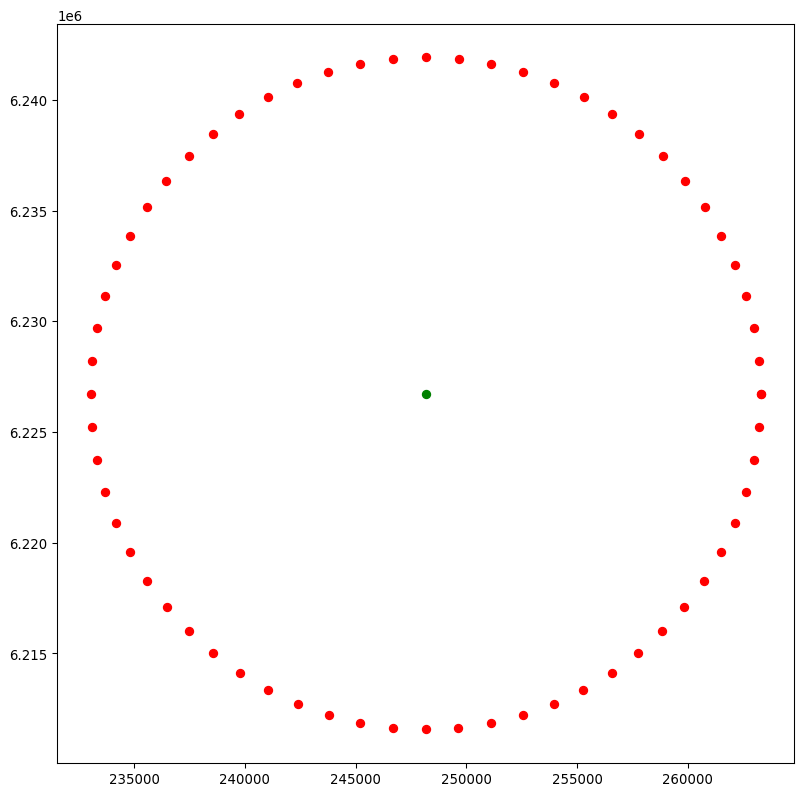

# 5. Additional exercises

## 5.1 Discover the `OpenFoodFacts` API

To help you, you can look at an example of the JSON structure here: <https://world.openfoodfacts.org/api/v0/product/3274080005003.json>, particularly the `nutriments` category.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercise 3: Find products in OpenFoodFacts 🍕</h3>

Here is a list of barcodes: `3274080005003, 5449000000996, 8002270014901, 3228857000906, 3017620421006, 8712100325953`

Use the [OpenFoodFacts API](https://world.openfoodfacts.org/data) (the API, not from the CSV!) to find the corresponding products and their nutritional characteristics.

Does the basket seem balanced? 🍫

Retrieve the URL of one of the images and display it in your browser.

</div>

For example, here is the photo of the product with the barcode `5449000000996`. Do you recognize it?

![](https://images.openfoodfacts.org/images/products/544/900/000/0996/front_en.782.200.jpg)